In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
# import torch


In [13]:
analysis_file = '/srv/scratch6/kew/ats/fudge/analysis/newsela4_bart_glove-lambda1.json'
analysis_file = '/srv/scratch6/kew/ats/fudge/analysis/newsela4_bart_glove-lambda5.json'
analysis_file = '/srv/scratch6/kew/ats/fudge/analysis/newsela4_bart_glove-lambda10.json'

data = []
with open(analysis_file, 'r', encoding='utf8') as inf:
    for line in inf:
        data.append(json.loads(line.strip()))
        
print(len(data))

20


In [14]:
data

[{'time_step': 1,
  'top_tokens': [['mem',
    'Mem',
    'the',
    'in',
    'there',
    'a',
    '<s>',
    'for',
    'medical',
    'one',
    'this',
    'to',
    'it',
    'among',
    'm',
    'children',
    'on',
    'memory',
    'an',
    'when',
    'as',
    'how',
    'hon',
    'n',
    'they',
    'program',
    'he',
    'M',
    'with',
    'all',
    'med',
    'and',
    'such',
    'through',
    'we',
    'part',
    'active',
    'thanks',
    'treatment',
    'these',
    'sever',
    'during',
    'more',
    'Dr',
    'some',
    'given',
    'surv',
    'where',
    'that',
    'thank',
    'at',
    'school',
    'www',
    'their',
    'harm',
    'exper',
    'being',
    'kids',
    'remember',
    'rest',
    'if',
    'many',
    'you',
    'from',
    'after',
    'before',
    'pres',
    'another',
    'H',
    'Med',
    'other',
    'camp',
    'what',
    'according',
    '"',
    'of',
    'te',
    'tra',
    'projects',
    'each',
    'stud

In [15]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

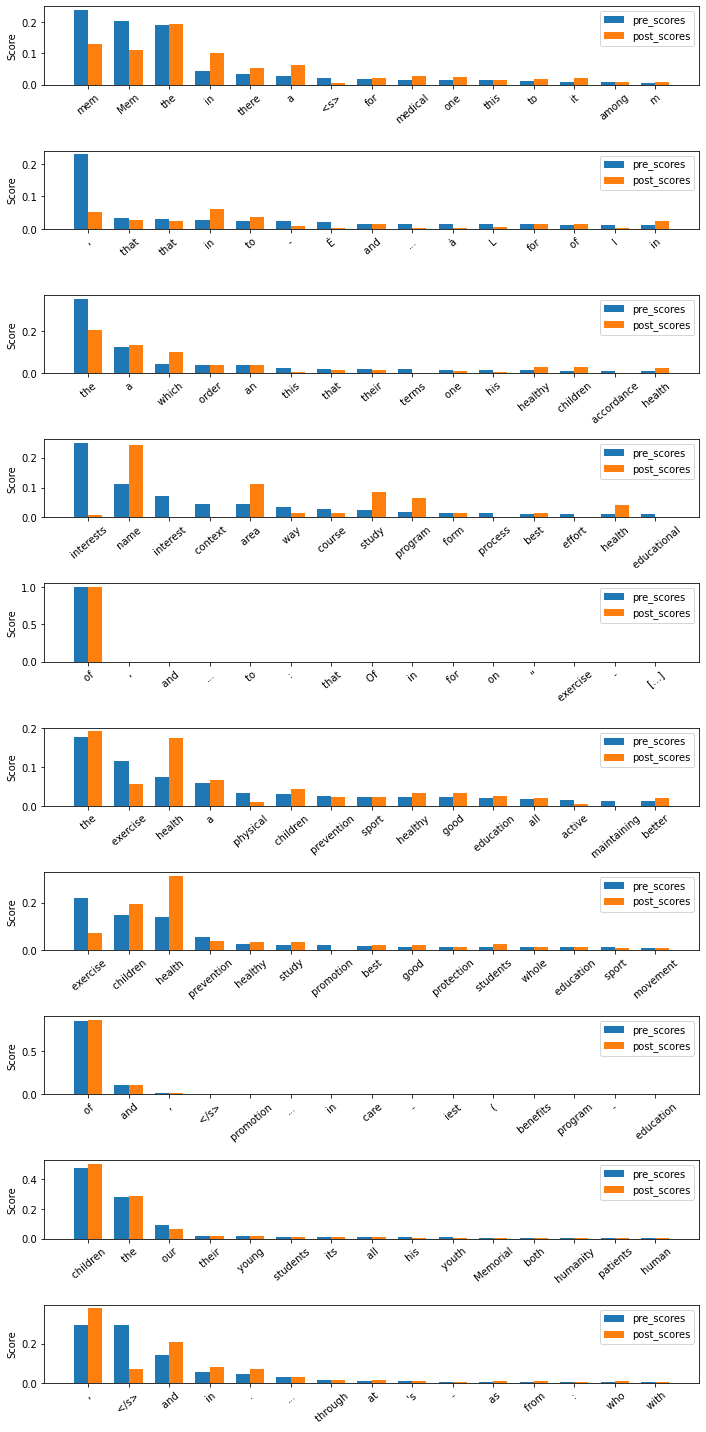

In [16]:
timesteps = 10
top_k = 15
fig, axes = plt.subplots(nrows=timesteps, ncols=1, figsize=(10, 20), sharex=False)

hyp = 0
x = np.arange(top_k)  # the label locations
width = 0.35  # the width of the bars

for i in range(len(data))[:timesteps]:
#     print(data[i]['time_step'])
    tokens = data[i]['top_tokens'][hyp][:top_k]
    pre_scores = softmax(np.array(data[i]['pre_scores'][hyp]))[:top_k]
    post_scores = softmax(np.array(data[i]['post_scores'][hyp]))[:top_k]
#     pre_scores = np.array(data[i]['pre_scores'][hyp][:top_k])
#     post_scores = np.array(data[i]['post_scores'][hyp][:top_k])
#     print(pre_scores)
    axes[i].bar(x-width/2, pre_scores, width, label='pre_scores', align='center')
    axes[i].bar(x+width/2, post_scores, width, label='post_scores', align='center')
    
#     print(tokens)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(tokens, rotation=40)
    axes[i].legend()

# plt.xticks(rotation=40)
#     axes[i].bar_label(rects1, padding=3)
#     axes[i].bar_label(rects2, padding=3)
plt.tight_layout()